In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


2024-03-23 22:19:22.080420: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-23 22:19:22.080463: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dataset_dir = './data/'  # Update this to the path where your dataset is located
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'test')

# Parameters
batch_size = 32
img_height = 150
img_width = 150


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 2342 images belonging to 28 classes.
Found 236 images belonging to 27 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


2024-03-23 22:19:24.366734: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-23 22:19:24.366929: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-23 22:19:24.366967: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2024-03-23 22:19:24.366995: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2024-03-23 22:19:24.367020: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)


Epoch 1/20
73/73 [==============================] - 52s 711ms/step - loss: -381853152.0000 - accuracy: 0.0351 - val_loss: -3373984512.0000 - val_accuracy: 0.0402
Epoch 2/20
73/73 [==============================] - 35s 476ms/step - loss: -82107473920.0000 - accuracy: 0.0355 - val_loss: -365056786432.0000 - val_accuracy: 0.0357
Epoch 3/20
73/73 [==============================] - 35s 479ms/step - loss: -1830698614784.0000 - accuracy: 0.0351 - val_loss: -5056393379840.0000 - val_accuracy: 0.0402
Epoch 4/20
73/73 [==============================] - 35s 474ms/step - loss: -13748012056576.0000 - accuracy: 0.0355 - val_loss: -31056575070208.0000 - val_accuracy: 0.0402
Epoch 5/20
73/73 [==============================] - 36s 494ms/step - loss: -60209934368768.0000 - accuracy: 0.0346 - val_loss: -115541926739968.0000 - val_accuracy: 0.0402
Epoch 6/20
73/73 [==============================] - 36s 488ms/step - loss: -187446817980416.0000 - accuracy: 0.0351 - val_loss: -331937621213184.0000 - val_accu

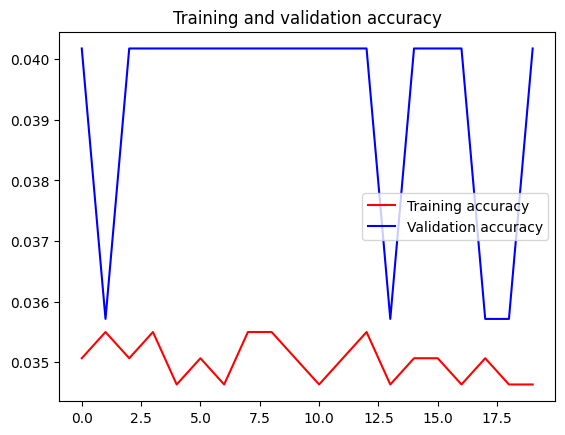

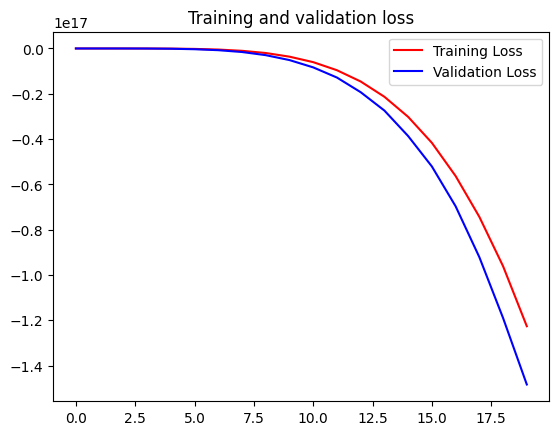

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
